In [1]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

Kép feltöltése és betöltése.

Saving book1.jpg to book1.jpg
(800, 600, 3)


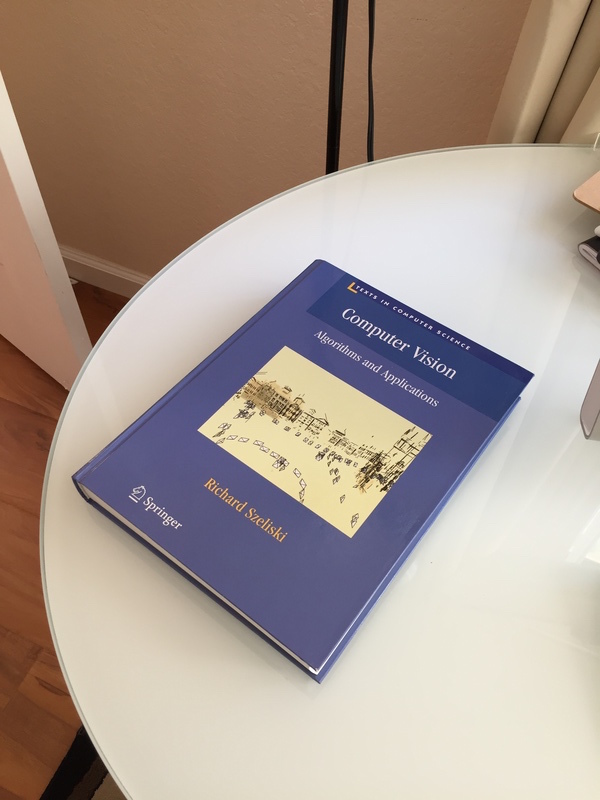

In [2]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
image = cv2.imread(f"{img_path}")
print(image.shape)
cv2_imshow(image)

Konvolúciós kernel megadása.

In [4]:
kernel = np.array([[-1., -1., -1.], [0.,  0., 0.], [1., 1., 1.]]) / 1
print(kernel)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


Konvolúció kiszámítása. Ez a verzió a negatív értékeket nem kezeli.

In [5]:
conv_output = cv2.filter2D(image, -1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
min = np.min(conv_output)
print(min)

0


Eredmények megjelenítse.

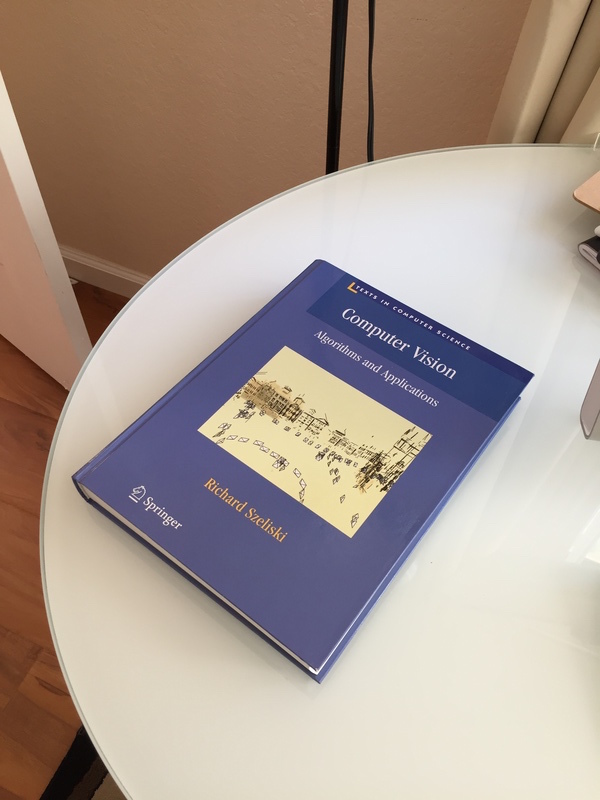

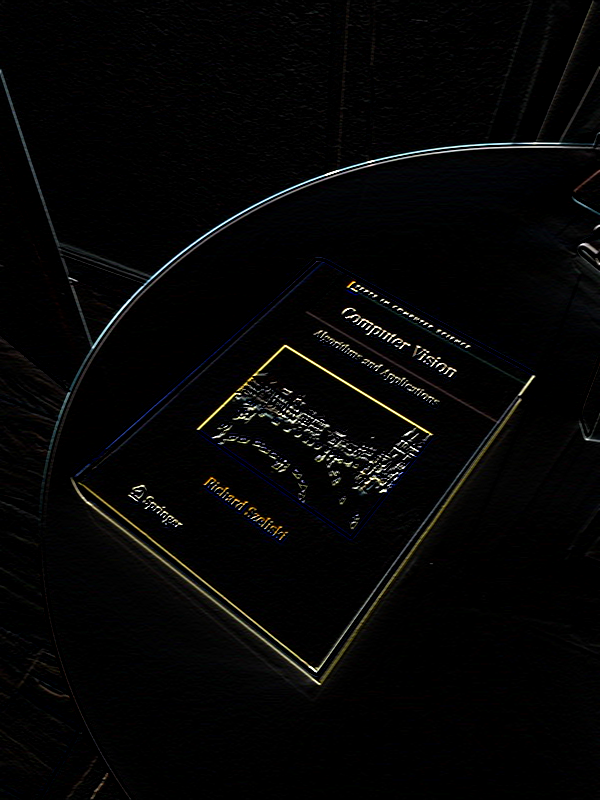

In [6]:
cv2_imshow(image)
cv2_imshow(conv_output)

Ebben az esetben már a negatív értékekkel is számolunk, azokat a kirajzolás előtt át kell alakítani....

-535.0
-6.078471059822732e-15 255.00000000000003


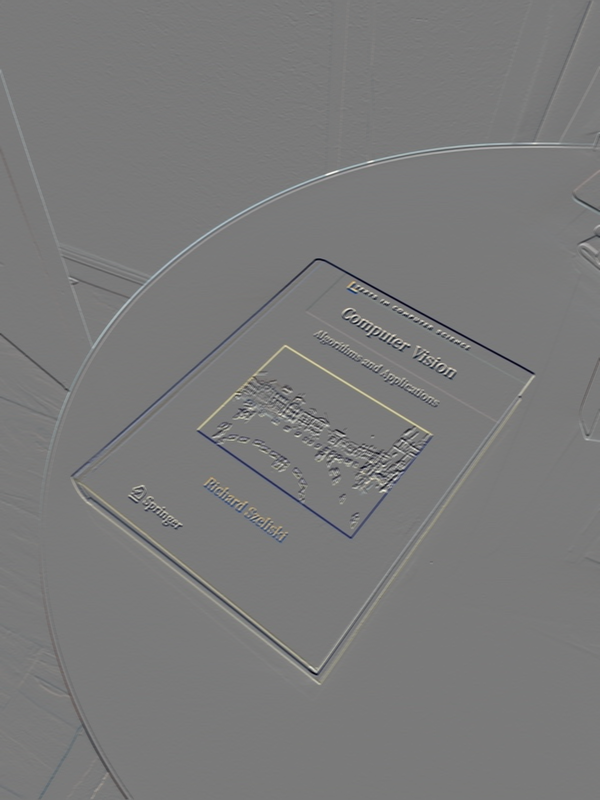

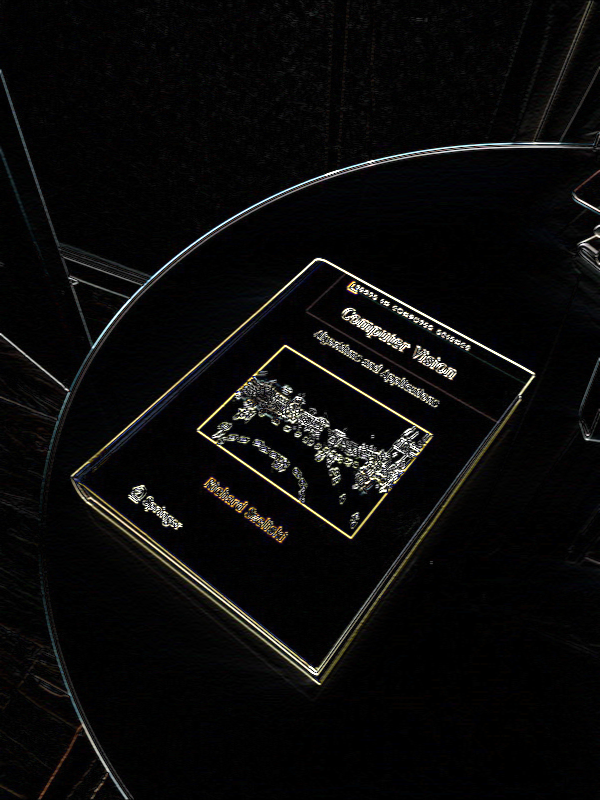

In [7]:
conv_output = cv2.filter2D(image.astype('float'), -1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
min = np.min(conv_output)
print(min)
conv_output_normalized = cv2.normalize(conv_output, None, 0.0, 255, cv2.NORM_MINMAX)
min = np.min(conv_output_normalized)
max = np.max(conv_output_normalized)
print(min,max)
conv_output_abs = np.abs(conv_output)
cv2_imshow(conv_output_normalized)
cv2_imshow(conv_output_abs)
